In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
#infile = open("calo_data_output.csv", "r")
#readin = csv.reader(infile)

In [3]:
caloData = pandas.read_csv("calo_data_output.csv")

In [4]:
caloData.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
1,1,15937275,15937,27,7,574.0
2,1,15937277,15937,27,9,571.0
3,1,15937279,15937,27,11,547.0
4,1,159372711,15937,27,14,471.0


In [5]:
caloData.loc[caloData['Global Bin'] == 15937273].head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,513.0
20677,2,15937273,15937,27,5,508.0
41354,3,15937273,15937,27,5,642.0
62031,4,15937273,15937,27,5,624.0
82708,5,15937273,15937,27,5,655.0


In [6]:
caloData1 = caloData.loc[caloData['Calorimeter Number'] == 1]
caloData1.tail()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
20672,1,15928463145,15928,463,147,580.0
20673,1,15928463147,15928,463,149,518.0
20674,1,15928463149,15928,463,151,585.0
20675,1,15928463151,15928,463,154,439.0
20676,1,15928463154,15928,463,154,476.0


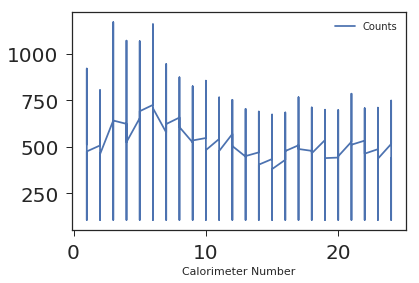

In [7]:
caloData.plot(y='Counts',x='Calorimeter Number')

In [8]:
data = []
for i in range(1,25):
    caloDatai = caloData.loc[caloData['Calorimeter Number'] == i]
    data.append(caloDatai['Counts'])

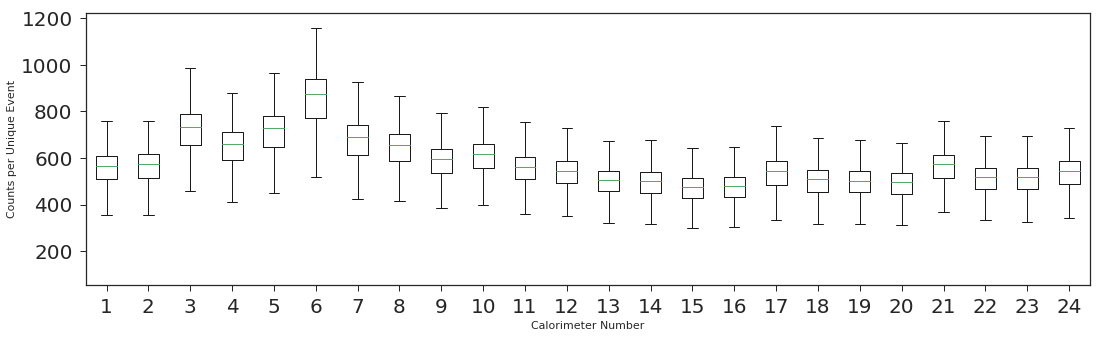

In [9]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(data)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.show()

Ok, this doesn't show the pattern that Kim was talking about earlier. Lets try to get the energy version and see from there

In [10]:
caloDataEnergy = pandas.read_csv("calo_data_output_energy.csv")
caloDataEnergy.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,356983.925691
1,1,15937275,15937,27,7,398778.083723
2,1,15937277,15937,27,9,383569.855306
3,1,15937279,15937,27,11,385229.487335
4,1,159372711,15937,27,14,339763.080861


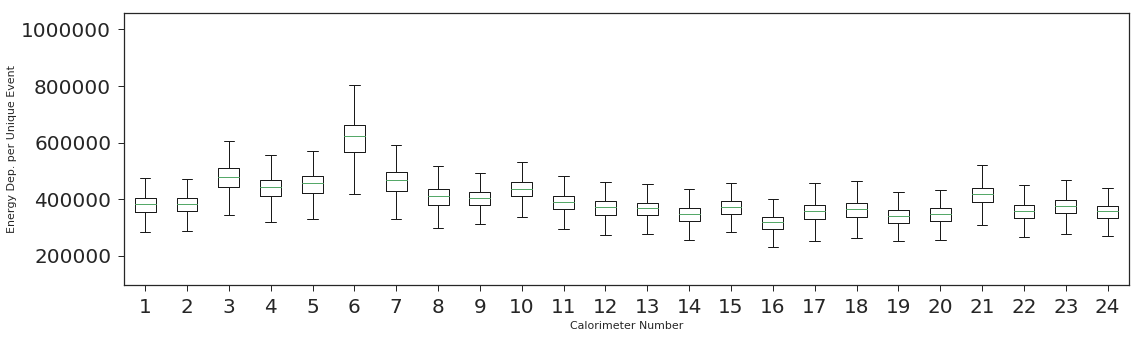

In [11]:
dataEnergy = []
for i in range(1,25):
    caloDatai = caloDataEnergy.loc[caloDataEnergy['Calorimeter Number'] == i]
    dataEnergy.append(caloDatai['Counts'])
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergy)
plt.xlabel('Calorimeter Number')
plt.ylabel('Energy Dep. per Unique Event')
plt.show()

This doesn't show the pattern either. Calo 2 is perfectly well behaved according to these two metrics. 

Now lets implement an energy cut (1000 < E < 3000 MeV) and see if that changes anything

In [12]:
caloDataEnergyCut = pandas.read_csv("calo_data_output_cutEnergy.csv")
caloDataEnergyCut.head()

,Calorimeter Number,Global Bin,Run Number,SubRun Number,Event Number,Counts
0,1,15937273,15937,27,5,68.0
1,1,15937275,15937,27,7,103.0
2,1,15937277,15937,27,9,84.0
3,1,15937279,15937,27,11,96.0
4,1,159372711,15937,27,14,54.0


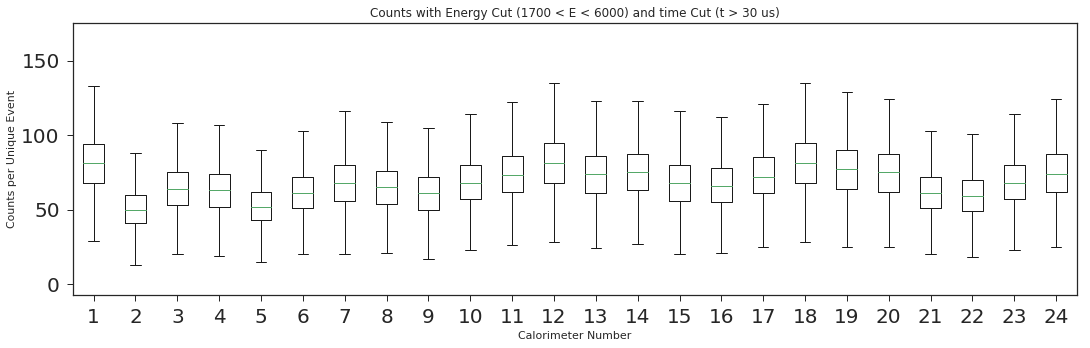

In [16]:
dataEnergyCut = []
for i in range(1,25):
    caloDatai = caloDataEnergyCut.loc[caloDataEnergyCut['Calorimeter Number'] == i]
    dataEnergyCut.append(caloDatai['Counts'])
fig, ax = plt.subplots(figsize=(18, 5))
ax.boxplot(dataEnergyCut)
plt.xlabel('Calorimeter Number')
plt.ylabel('Counts per Unique Event')
plt.title('Counts with Energy Cut (1700 < E < 6000) and time Cut (t > 30 us)')
plt.show()

Nope! If anything, it just makes everything clump closer together... Hmmmm